# 사후 분포

In [3]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

# 방문자 수
visit_A = 1300
visit_B = 1275

# 각 성공횟수
conversion_A = 120
conversion_B = 125

# 사전 지식이 없다는 전제일 때의 사전분포 Beta(1,1)
alpha = 1
beta  = 1

n_samples = 1000
print(alpha)

posterior_A = st.beta(alpha+conversion_A,beta+visit_A-conversion_A)
posterior_B = st.beta(alpha+conversion_B,beta+visit_B-conversion_B)
posterior_samples_A = st.beta(alpha+conversion_A,beta+visit_A-conversion_A).rvs(n_samples)
posterior_samples_B = st.beta(alpha+conversion_B,beta+visit_B-conversion_B).rvs(n_samples)

# posterior mean
print((posterior_samples_A > posterior_samples_B).mean())



1
0.286


A 디자인의 전환율이 B 디자인의 전환율보다 높을 확률이 28.6%정도밖에 되지 않음을 의미한다.

# 위 내용을 시각화한 그래프

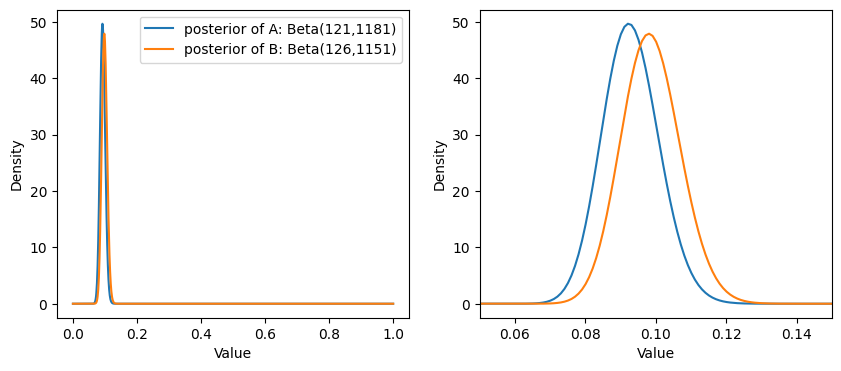

In [4]:
# Posterior Dist of A and B
fig,axes = plt.subplots(1,2,figsize=(10,4))
x = np.linspace(0,1,1000)
i=0
for ax in axes:
    ax.plot(x, posterior_A.pdf(x), label = "posterior of A: Beta(121,1181)")
    ax.plot(x, posterior_B.pdf(x), label = "posterior of B: Beta(126,1151)")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    if i==1:
        ax.set_xlim(0.05, 0.15)
    i+=1
axes[0].legend()

# 기대 수익 비교

In [5]:
# A 경우
n_A = 1000
x1_A= 10
x2_A= 46
x3_A= 80
x4_A=n_A-x1_A-x2_A-x3_A

# B 경우
n_B = 2000
x1_B= 45
x2_B= 84
x3_B= 200
x4_B=n_B-x1_B-x2_B-x3_B

# 사후분포 구하는 식
alpha_A=np.array([1+x1_A,1+x2_A,1+x3_A,1+x4_A])
alpha_B=np.array([1+x1_B,1+x2_B,1+x3_B,1+x4_B])

# 실제 사후분포 계
p_A = st.dirichlet(alpha_A).rvs(n_samples)
p_B = st.dirichlet(alpha_B).rvs(n_samples)

# 실제 기대 수익 계산(간단한 함수 사용)

In [7]:
def expected_revenue(P):
    return 75*P[:,0] + 49*P[:,1] + 25*P[:,2]

'''
함수 expected_revenue의 정의에서 75, 49, 25는 각각 가능한 가격에 대한 가격-확률 분포의 값을 나타내는 것으로 보입니다. 이것은 가능한 가격에 대한 가중치를 나타내며, 함수는 주어진 확률 분포 P에 대해 기대 수익을 계산합니다.

예를 들어, 가능한 가격이 [10, 46, 80]이라고 가정하면, expected_revenue 함수는 다음과 같이 가격과 확률을 가중합하여 기대 수익을 계산합니다:

python
Copy code
expected_revenue = 75 * P[:, 0] + 49 * P[:, 1] + 25 * P[:, 2]
즉, 각 가격에 대한 확률을 해당 가격의 가중치로 곱한 후 모두 더하여 기대 수익을 계산합니다. 이렇게 75, 49, 25가 나타나는 이유는 각 가격이 해당 확률로 발생할 때 기대 수익의 가중치를 나타내기 위함입니다.

지피티 설명
'''

In [8]:
ER_A=expected_revenue(p_A)
ER_B=expected_revenue(p_B)

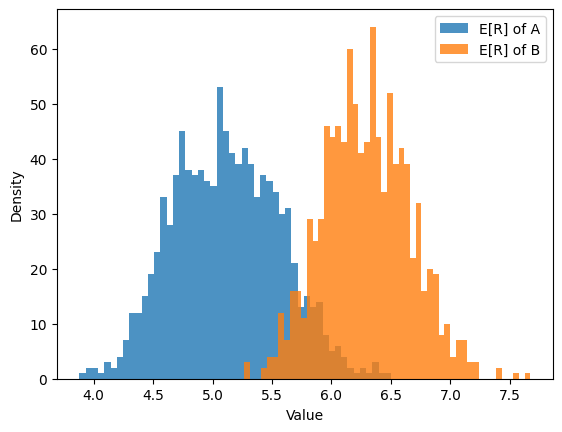

In [9]:
plt.hist(ER_A,label="E[R] of A",bins=50,histtype="stepfilled",alpha=.8)
plt.hist(ER_B,label="E[R] of B",bins=50,histtype="stepfilled",alpha=.8)
plt.xlabel("Value"); plt.ylabel("Density")
plt.legend(loc="best")

In [12]:
# 실제 기대수익이 B 가 더 높을 확룰
print((ER_B>ER_A).mean())


0.977


# B 디자인의 기대 수익이 A 디자인보다 얼마나 더 많은 지 확인하는 방법은 이 두 기대수익의 차 (difference)의 사후 분포

Text(0.5, 1.0, 'Posterior Distribution of Difference of E[$R_B$]-E[$R_A$]')

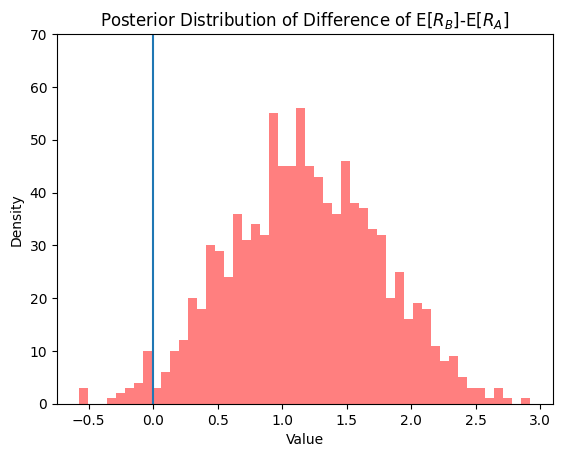

In [13]:
plt.hist(ER_B-ER_A,histtype="stepfilled",color="red",alpha=0.5,bins=50)
plt.vlines(0,0,70,linestyle='solid')
plt.xlabel("Value")
plt.ylabel("Density")
plt.ylim(0,70)
plt.title("Posterior Distribution of Difference of E[$R_B$]-E[$R_A$]")